In [1]:
#data loading and importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches


In [2]:
#importing our cancer dataset
dataset = pd.read_csv('./cancerDataset.csv')
X = dataset.iloc[:, 1:31].values
Y = dataset.iloc[:, 31].values

In [3]:
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [4]:
#Data Visualization
import seaborn as sns; sns.set(style="ticks", color_codes=True)

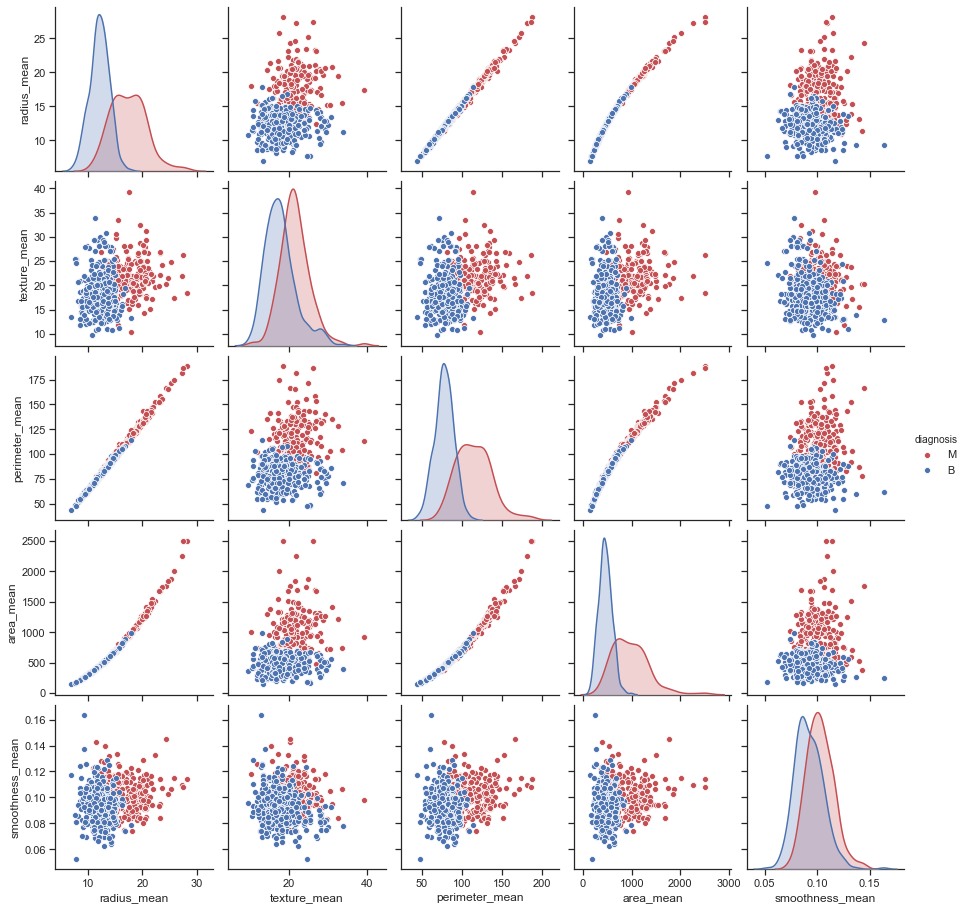

In [5]:
sns.pairplot(dataset,  palette = ('r','b') ,hue = 'diagnosis', vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean','smoothness_mean'] )

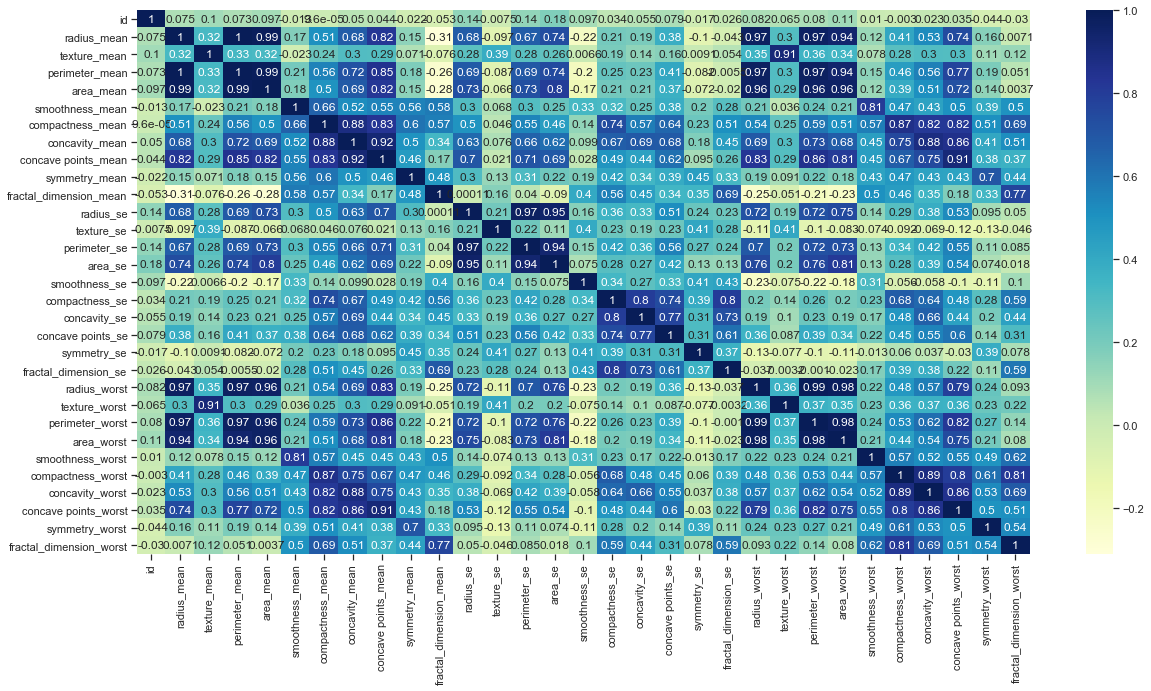

In [6]:
#Encoding categorical data values from 'M/B' to '1/0'
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

plt.figure(figsize=(20,10)) 
sns.heatmap(dataset.corr(), annot=True,cmap="YlGnBu" )

['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']


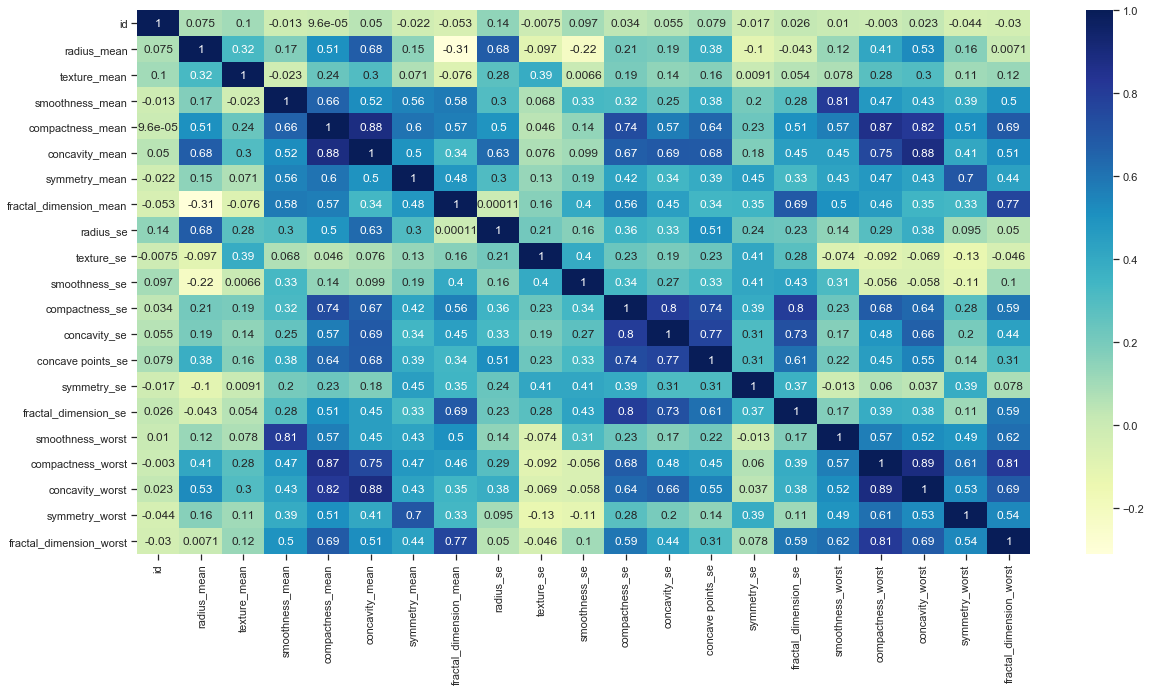

In [7]:
corr_matrix = dataset.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column]>0.9)]
print(to_drop)

#Removing the highly correlated attributes
dataset_cropped = dataset.drop(dataset[to_drop],axis=1)
plt.figure(figsize=(20,10)) 
sns.heatmap(dataset_cropped.corr(), annot=True,cmap="YlGnBu")

In [8]:
#spilliting data in training and test 
X = dataset_cropped.iloc[:, 1:21].values
Y = dataset_cropped.iloc[:, 21].values

labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
print(len(X_train))

426


In [9]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1]
0.958041958041958
Accuracy: 0.958041958041958
Precision: 0.9607843137254902
Recall: 0.9245283018867925


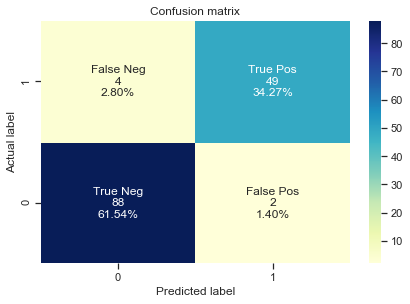

In [10]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(random_state = 0)
classifier_LR.fit(X_train, Y_train)

predictions_LR = classifier_LR.predict(X_test)
score_LR = classifier_LR.score(X_test, Y_test)
print(predictions_LR)
print(score_LR) #print Accuracy


#Model Evaluation using Confusion Matrix

cnf_matrix_LR = metrics.confusion_matrix(Y_test,predictions_LR)
cnf_matrix_LR

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cnf_matrix_LR.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cnf_matrix_LR.flatten()/np.sum(cnf_matrix_LR)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix_LR, annot=labels, cmap="YlGnBu" ,fmt='')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.set_ylim([0,2])



print("Accuracy:",metrics.accuracy_score(Y_test, predictions_LR))
print("Precision:",metrics.precision_score(Y_test, predictions_LR))
print("Recall:",metrics.recall_score(Y_test, predictions_LR))

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1]
0.9370629370629371
Accuracy: 0.9370629370629371
Precision: 0.9230769230769231
Recall: 0.9056603773584906


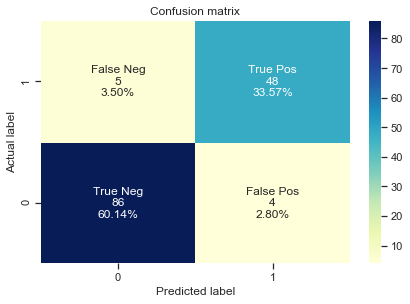

In [11]:
#SVM

classifier_SVC = SVC(kernel = 'linear', random_state = 0, probability=True)
#classifier_SVC = CalibratedClassifierCV(svm)
classifier_SVC.fit(X_train, Y_train)

predictions_SVC = classifier_SVC.predict(X_test)
score_SVC = classifier_SVC.score(X_test, Y_test)
print(predictions_SVC)
print(score_SVC) #print Accuracy

#Confusion Matrix

cnf_matrix_SVC = metrics.confusion_matrix(Y_test,predictions_SVC)
cnf_matrix_SVC

#Confusion Matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cnf_matrix_SVC.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cnf_matrix_SVC.flatten()/np.sum(cnf_matrix_SVC)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix_SVC, annot=labels, cmap="YlGnBu" ,fmt='')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.set_ylim([0,2])


print("Accuracy:",metrics.accuracy_score(Y_test, predictions_SVC))
print("Precision:",metrics.precision_score(Y_test, predictions_SVC))
print("Recall:",metrics.recall_score(Y_test, predictions_SVC))





[1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1]
0.8881118881118881
Accuracy: 0.8881118881118881
Precision: 0.8363636363636363
Recall: 0.8679245283018868


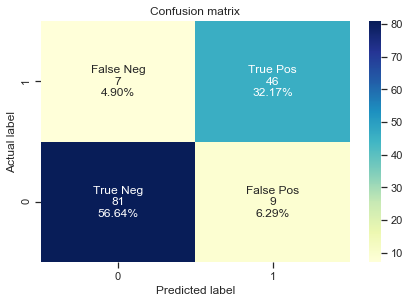

In [12]:
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm

classifier_NB = GaussianNB()
classifier_NB.fit(X_train, Y_train)


predictions_NB = classifier_NB.predict(X_test)
score_NB = classifier_NB.score(X_test, Y_test)
print(predictions_NB)
print(score_NB) #print Accuracy


#Confusion Matrix

cnf_matrix_NB = metrics.confusion_matrix(Y_test,predictions_NB)
cnf_matrix_NB
#Confusion Matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cnf_matrix_NB.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cnf_matrix_NB.flatten()/np.sum(cnf_matrix_NB)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix_NB, annot=labels, cmap="YlGnBu" ,fmt='')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.set_ylim([0,2])


print("Accuracy:",metrics.accuracy_score(Y_test, predictions_NB))
print("Precision:",metrics.precision_score(Y_test, predictions_NB))
print("Recall:",metrics.recall_score(Y_test, predictions_NB))



[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]
0.9370629370629371
Accuracy: 0.9370629370629371
Precision: 0.9074074074074074
Recall: 0.9245283018867925


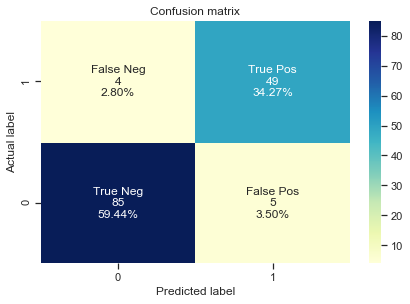

In [13]:
#Decision Tree

classifier_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_DT.fit(X_train, Y_train)


predictions_DT = classifier_DT.predict(X_test)
score_DT = classifier_DT.score(X_test, Y_test)
print(predictions_DT)
print(score_DT) #print Accuracy


#Confusion Matrix

cnf_matrix_DT = metrics.confusion_matrix(Y_test,predictions_DT)
cnf_matrix_DT
#Confusion Matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cnf_matrix_DT.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cnf_matrix_DT.flatten()/np.sum(cnf_matrix_DT)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix_DT, annot=labels, cmap="YlGnBu" ,fmt='')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.set_ylim([0,2])


print("Accuracy:",metrics.accuracy_score(Y_test, predictions_DT))
print("Precision:",metrics.precision_score(Y_test, predictions_DT))
print("Recall:",metrics.recall_score(Y_test, predictions_DT))

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1]
0.972027972027972
Accuracy: 0.972027972027972
Precision: 0.9803921568627451
Recall: 0.9433962264150944


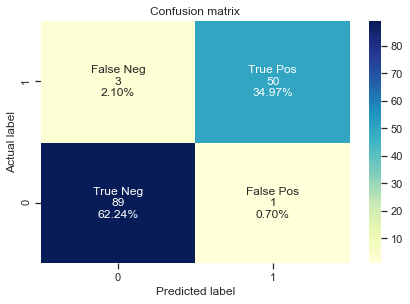

In [14]:
classifier_mlp = MLPClassifier(
    max_iter=1000,
    alpha=0.1,
    activation='logistic',
    solver='adam',
    random_state=42
)

classifier_mlp.fit(X_train, Y_train)

predictions_mlp = classifier_mlp.predict(X_test)
score_mlp = classifier_mlp.score(X_test, Y_test)
print(predictions_mlp)
print(score_mlp) #print Accuracy


#Confusion Matrix

cnf_matrix_mlp = metrics.confusion_matrix(Y_test,predictions_mlp)
cnf_matrix_mlp
#Confusion Matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cnf_matrix_mlp.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cnf_matrix_mlp.flatten()/np.sum(cnf_matrix_mlp)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix_mlp, annot=labels, cmap="YlGnBu" ,fmt='')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.set_ylim([0,2])


print("Accuracy:",metrics.accuracy_score(Y_test, predictions_mlp))
print("Precision:",metrics.precision_score(Y_test, predictions_mlp))
print("Recall:",metrics.recall_score(Y_test, predictions_mlp))


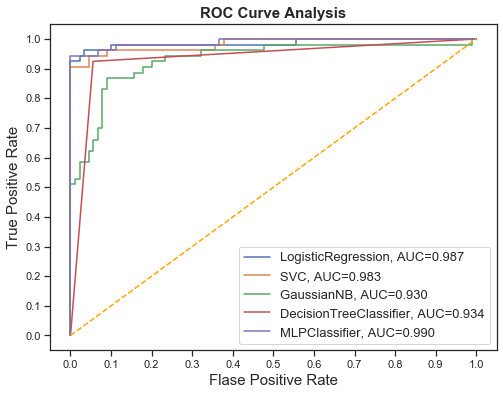

In [15]:
all_classifiers = [classifier_LR,classifier_SVC,classifier_NB,classifier_DT,classifier_mlp]

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

for cls in all_classifiers:
    y_pred_proba = cls.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(Y_test, y_pred_proba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    
result_table.set_index('classifiers', inplace=True)

#Plot ROC

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()